In [6]:
import pandas as pd
import numpy as np

In [7]:
training_set_input1 = np.array([[81.676,81.670,81.670,81.681,81.626,81.702]])
for i in training_set_input1 :
    training_set_input2 = training_set_input1*0.01
    
training_set_input2

array([[0.81676, 0.8167 , 0.8167 , 0.81681, 0.81626, 0.81702]])

In [8]:
training_set_output1 = np.array([[81.653]])
for i in training_set_output1 :
    training_set_output2 = training_set_output1*0.01
    
training_set_output2

array([[0.81653]])

In [9]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 6 input connections and 1 output connection.
        # We assign random weights to a 6 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((6, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_input, training_set_output, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_input)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_output - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            adjustment = dot(training_set_input.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set. We have 1 example, of 6 input values
    # and 1 output value.
training_set_input = training_set_input2

training_set_output = training_set_output2

# Train the neural network using a training set.
# Do it 200 times and make small adjustments each time.
neural_network.train(training_set_input, training_set_output, 900)

print("New synaptic weights after training: ")
print(neural_network.synaptic_weights)


Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]
 [-0.81532281]]
New synaptic weights after training: 
[[ 0.57913887]
 [ 1.18568912]
 [-0.25473112]
 [ 0.34980562]
 [ 0.03815052]
 [-0.06999076]]


In [10]:
new_value = array([[ 81.653,81.676,81.670,81.670,81.681,81.626]])
for i in new_value:
    new_value = new_value*0.01

In [11]:
Predicted_Value = neural_network.think(array(new_value))
Predicted_Value = Predicted_Value *100
print(Predicted_Value)

[[81.65260505]]


# Error Calculation

In [12]:
import math  
import sklearn.metrics  
actual = training_set_output2*100
predicted = Predicted_Value
mse = sklearn.metrics.mean_squared_error(actual, predicted)  
  
rmse = math.sqrt(mse)  
  
print("The RMSE between actual and predicted values \n")
print(rmse)

The RMSE between actual and predicted values 

0.00039495088725516325


# Try with the whole Dataset

In [13]:
exchange_data = pd.read_csv(r"D:\Study Subjects\ML Domain\Predictive analysis\forex_data_10y.csv")
exchange_data 

,Date,Price,Open,High,Low,Volume,Chg
0,25-Aug-20,74.327,74.100,74.335,74.075,0.92K,0.22%
1,24-Aug-20,74.168,74.922,74.922,73.962,4.90K,-1.01%
2,23-Aug-20,74.922,74.922,74.922,74.922,0,0.00%
3,21-Aug-20,74.920,74.980,75.005,74.820,3.16K,-0.12%
4,20-Aug-20,75.012,74.973,75.132,74.935,3.70K,0.22%
...,...,...,...,...,...,...,...
2605,01-Sep-10,46.675,47.045,47.045,46.575,0,-0.83%
2606,31-Aug-10,47.065,46.875,47.150,46.505,0,0.32%
2607,30-Aug-10,46.915,46.725,46.935,46.385,0,0.22%
2608,27-Aug-10,46.810,46.755,47.010,46.565,0,-0.07%


In [14]:
exchange_data = pd.read_csv(r"D:\Study Subjects\ML Domain\Predictive analysis\forex_data_10y.csv")
df = exchange_data.Open
df1 = df.reindex(index=df.index[::-1])
data = pd.DataFrame(df1)
data.reset_index(inplace = True, drop = True)
array_data = pd.DataFrame(exchange_data['Open'].head())
array_data = (array_data.to_numpy(dtype=float))
array_data

array([[74.1  ],
       [74.922],
       [74.922],
       [74.98 ],
       [74.973]])

In [15]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided  
win = 7
v = as_strided(data.Open, (len(data) - (win - 1), win), (data.Open.values.strides * 2))

In [16]:
data_final = pd.DataFrame(v)
data_final.rename(columns={0: 'x1',1: 'x2',2: 'x3',3: 'x4',4: 'x5',5: 'x6',6: 'y'}, inplace=True)
data_final 

,x1,x2,x3,x4,x5,x6,y
0,46.825,46.755,46.725,46.875,47.045,46.595,46.605
1,46.755,46.725,46.875,47.045,46.595,46.605,46.395
2,46.725,46.875,47.045,46.595,46.605,46.395,46.505
3,46.875,47.045,46.595,46.605,46.395,46.505,46.797
4,47.045,46.595,46.605,46.395,46.505,46.797,46.460
...,...,...,...,...,...,...,...
2599,74.615,74.775,74.890,74.903,74.740,74.655,74.973
2600,74.775,74.890,74.903,74.740,74.655,74.973,74.980
2601,74.890,74.903,74.740,74.655,74.973,74.980,74.922
2602,74.903,74.740,74.655,74.973,74.980,74.922,74.922


In [17]:
x = data_final.drop("y", axis='columns')
x = (x.to_numpy(dtype=float))
training_set_input1 = x
for i in training_set_input1:
    x = training_set_input1*0.01
x

array([[0.46825, 0.46755, 0.46725, 0.46875, 0.47045, 0.46595],
       [0.46755, 0.46725, 0.46875, 0.47045, 0.46595, 0.46605],
       [0.46725, 0.46875, 0.47045, 0.46595, 0.46605, 0.46395],
       ...,
       [0.7489 , 0.74903, 0.7474 , 0.74655, 0.74973, 0.7498 ],
       [0.74903, 0.7474 , 0.74655, 0.74973, 0.7498 , 0.74922],
       [0.7474 , 0.74655, 0.74973, 0.7498 , 0.74922, 0.74922]])

In [18]:
y = data_final.y
y = pd.DataFrame(y)
training_set_output1 = (y.to_numpy(dtype=float))
for i in training_set_output1 :
    y = training_set_output1*0.01
y

array([[0.46605],
       [0.46395],
       [0.46505],
       ...,
       [0.74922],
       [0.74922],
       [0.741  ]])

In [ ]:
from numpy import exp, array, random, dot

Y_Predicted_Value = []

def Head():
    
    class NeuralNetwork():
        def __init__(self):
            # Seed the random number generator, so it generates the same numbers
            # every time the program runs.
            random.seed(1)

            # We model a single neuron, with 6 input connections and 1 output connection.
            # We assign random weights to a 6 x 1 matrix, with values in the range -1 to 1
            # and mean 0.
            self.synaptic_weights = 2 * random.random((6, 1)) - 1

        # The Sigmoid function, which describes an S shaped curve.
        # We pass the weighted sum of the inputs through this function to
        # normalise them between 0 and 1.
        def __sigmoid(self, x):
            return 1 / (1 + exp(-x))

        # The derivative of the Sigmoid function.
        # This is the gradient of the Sigmoid curve.
        # It indicates how confident we are about the existing weight.
        def __sigmoid_derivative(self, x):
            return x * (1 - x)

        # We train the neural network through a process of trial and error.
        # Adjusting the synaptic weights each time.
        def train(self, training_set_input, training_set_output, number_of_training_iterations):
            for iteration in range(number_of_training_iterations):
                # Pass the training set through our neural network (a single neuron).
                output = self.think(training_set_input)

                # Calculate the error (The difference between the desired output
                # and the predicted output).
                error = training_set_output - output

                # Multiply the error by the input and again by the gradient of the Sigmoid curve.
                # This means less confident weights are adjusted more.
                adjustment = dot(training_set_input.T, error * self.__sigmoid_derivative(output))

                # Adjust the weights.
                self.synaptic_weights += adjustment

        # The neural network thinks.
        def think(self, inputs):
            # Pass inputs through our neural network (our single neuron).
            return self.__sigmoid(dot(inputs, self.synaptic_weights))


    if __name__ == "__main__":

        #Intialise a single neuron neural network.
        neural_network = NeuralNetwork()


    # Train the neural network using a training set.
    # Do it 200 times and make small adjustments each time.
    neural_network.train(training_set_input, training_set_output, 200)

    new_value = training_set_input

    y_predict = neural_network.think(array(new_value))
    Y_Predicted_Value.append(y_predict)

# Passing the whole dataset through for loop with a multiplication of 0.01
for i in range(0, len(x)):    
        training_set_input2 = x[i]
        training_set_input2.shape = (6, 1)
        training_set_input = training_set_input2.T
        
        for i in range(0, len(y)):    
            training_set_output2 = y[i]
            training_set_output2.shape = (1, )
            training_set_output = training_set_output2
            
            Head()
            
        break

In [ ]:
Y_Predicted_Value

In [28]:
Y_Predict_Value = np.reshape(Y_Predicted_Value,(2604, 1))

for i in Y_Predict_Value:
    Y_Predict = Y_Predict_Value*100
    
Y_Predict

array([[46.60499831],
       [46.39499828],
       [46.50499829],
       ...,
       [74.92058422],
       [74.92058422],
       [74.0990207 ]])

# ERROR

### (1)RMSE

In [29]:
import math  
import sklearn.metrics  
actual = training_set_output1
predicted = Y_Predict
mse = sklearn.metrics.mean_squared_error(actual, predicted)  
  
rmse = math.sqrt(mse)  

print("--------------------------------------------") 
print("The RMSE between actual and predicted values ")
print("-------------------------------------------- \n") 
print(rmse)

--------------------------------------------
The RMSE between actual and predicted values 
-------------------------------------------- 

0.0004351728217580404


### (2)MAPE

In [47]:
#Defining MAPE function
def MAPE(actual, predicted):
    mape = np.mean(np.abs((actual - predicted)/actual))*100
    return mape

In [48]:
actual = training_set_output1
predicted = Y_Predict
print("--------------------------------------------") 
print("The MAPE between actual and predicted values ")
print("-------------------------------------------- \n")
MAPE(actual, predicted)

--------------------------------------------
The MAPE between actual and predicted values 
-------------------------------------------- 



0.7720632924253067

# Visualize the Data

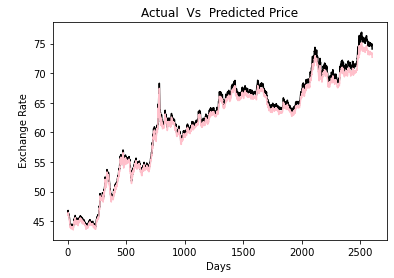

In [60]:
import matplotlib.pyplot as plt

plt.plot(training_set_output1, color='black', label='Actual Prices')
plt.plot(Y_Predict, color='pink', label='Prediction Prices')
plt.title('Actual  Vs  Predicted Price')
plt.ylabel('\n Exchange Rate');
plt.xlabel('Days ');
plt.show()